In [ ]:
!pip install git+https://github.com/deepvision-class/starter-code

  Cloning https://github.com/deepvision-class/starter-code to /tmp/pip-req-build-jlgo6bn9
  Running command git clone -q https://github.com/deepvision-class/starter-code /tmp/pip-req-build-jlgo6bn9
  Created wheel for Colab-Utils: filename=Colab_Utils-0.1.dev0-cp36-none-any.whl size=10324 sha256=3b706e561eef75137a1b81fada8a80070faacefb20e6e7669e21034152e036af
  Stored in directory: /tmp/pip-ephem-wheel-cache-b9bl9kos/wheels/63/d1/27/a208931527abb98d326d00209f46c80c9d745851d6a1defd10
Successfully built Colab-Utils


In [ ]:
import math
import torch
import coutils
from coutils import extract_drive_file_id, register_colab_notebooks, \
                    fix_random_seed, rel_error, compute_numeric_gradient, Solver
import matplotlib.pyplot as plt
import time

# for plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# data type and device for torch.tensor
to_float = {'dtype': torch.float, 'device': 'cpu'}
to_float_cuda = {'dtype': torch.float, 'device': 'cuda'}
to_double = {'dtype': torch.double, 'device': 'cpu'}
to_double_cuda = {'dtype': torch.double, 'device': 'cuda'}
to_long = {'dtype': torch.long, 'device': 'cpu'}
to_long_cuda = {'dtype': torch.long, 'device': 'cuda'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://colab.research.google.com/drive/1iX_X9-H9bblx8U2q0L8tUtkaCMSH6bNx?usp=sharing
여기서 ?usp=sharing은 제거해야 됨

In [ ]:
FULLY_CONNECTED_NOTEBOOK_LINK = "https://colab.research.google.com/drive/1iX_X9-H9bblx8U2q0L8tUtkaCMSH6bNx"

fcn_id = extract_drive_file_id(FULLY_CONNECTED_NOTEBOOK_LINK)
print('Google Drive file id: "%s"' % fcn_id)
register_colab_notebooks({'fully_connected_networks': fcn_id})

from fully_connected_networks import get_CIFAR10_data
from fully_connected_networks import Linear, ReLU, Linear_ReLU, Dropout
from fully_connected_networks import svm_loss, softmax_loss
from fully_connected_networks import sgd_momentum, rmsprop, adam

print('Import succesful!')

Google Drive file id: "1iX_X9-H9bblx8U2q0L8tUtkaCMSH6bNx"
Import succesful!


Extracting ./cifar-10-python.tar.gz to .



/usr/local/lib/python3.6/dist-packages/coutils/utils.py:54: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  idxs = (y_data == y).nonzero().view(-1)


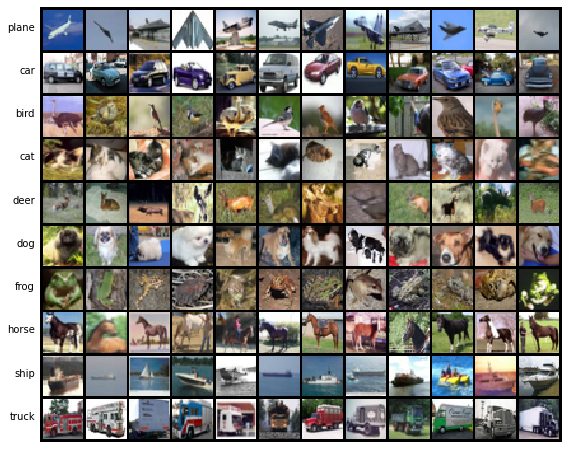

Train data shape:  torch.Size([47500, 3, 32, 32])
Train labels shape:  torch.Size([47500])
Validation data shape:  torch.Size([2500, 3, 32, 32])
Validation labels shape:  torch.Size([2500])
Test data shape:  torch.Size([10000, 3, 32, 32])
Test labels shape:  torch.Size([10000])


In [ ]:
data_dict = get_CIFAR10_data(visualize=True)

print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)

In [ ]:
class Conv(object):

    @staticmethod
    def forward(x, w, b, conv_param):
        raise NotImplementedError

    @staticmethod
    def backward(dout, cache):
        raise NotImplementedError

In [ ]:
def conv_forward(x, w, b, conv_param):
  """
  A naive implementation of the forward pass for a convolutional layer.
  The input consists of N data points, each with C channels, height H and
  width W. We convolve each input with F different filters, where each filter
  spans all C channels and has height HH and width WW.

  Input:
  - x: Input data of shape (N, C, H, W)
  - w: Filter weights of shape (F, C, HH, WW)
  - b: Biases, of shape (F,)
  - conv_param: A dictionary with the following keys:
    - 'stride': The number of pixels between adjacent receptive fields in the
    horizontal and vertical directions.
    - 'pad': The number of pixels that will be used to zero-pad the input. 
    
  During padding, 'pad' zeros should be placed symmetrically (i.e equally on both sides)
  along the height and width axes of the input. Be careful not to modfiy the original
  input x directly.

  Returns a tuple of:
  - out: Output data, of shape (N, F, H', W') where H' and W' are given by
    H' = 1 + (H + 2 * pad - HH) / stride
    W' = 1 + (W + 2 * pad - WW) / stride
  - cache: (x, w, b, conv_param)
  """
  out = None
  ##############################################################################
  # TODO: Implement the convolutional forward pass.                            #
  # Hint: you can use the function torch.nn.functional.pad for padding.        #
  # Note that you are NOT allowed to use anything in torch.nn in other places. #
  ##############################################################################
  # Replace "pass" statement with your code
  N, C, H, W = x.shape
  F, _, HH, WW = w.shape
  stride = conv_param.get('stride', 1)
  pad = conv_param.get('pad', 1)
  
  H_ = 1 + (H + 2 * pad - HH) // stride
  W_ = 1 + (W + 2 * pad - WW) // stride
  out = torch.zeros((N, F, H_, W_), device = x.device, dtype=x.dtype)
  x_pad = torch.nn.functional.pad(x, (pad, pad, pad, pad)).to(x.dtype).to(x.device)
  
  for image in range(N):
      for flt in range(F):
          for i in range(H_):
              for j in range(W_):
                  out[image, flt,i,j] = torch.sum(x_pad[image,:,i*stride:i*stride+HH,j*stride:j*stride+WW]*w[flt,:,:,:])+b[flt]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  cache = (x, w, b, conv_param)
  return out, cache

Conv.forward = conv_forward

In [ ]:
x_shape = torch.tensor((2, 3, 4, 4))
w_shape = torch.tensor((3, 3, 4, 4))
x = torch.linspace(-0.1, 0.5, steps=torch.prod(x_shape), **to_double_cuda).reshape(*x_shape)
w = torch.linspace(-0.2, 0.3, steps=torch.prod(w_shape), **to_double_cuda).reshape(*w_shape)
b = torch.linspace(-0.1, 0.2, steps=3, **to_double_cuda)

conv_param = {'stride': 2, 'pad': 1}
out, _ = Conv.forward(x, w, b, conv_param)
correct_out = torch.tensor([[[[-0.08759809, -0.10987781],
                              [-0.18387192, -0.2109216 ]],
                             [[ 0.21027089,  0.21661097],
                              [ 0.22847626,  0.23004637]],
                             [[ 0.50813986,  0.54309974],
                              [ 0.64082444,  0.67101435]]],
                            [[[-0.98053589, -1.03143541],
                              [-1.19128892, -1.24695841]],
                             [[ 0.69108355,  0.66880383],
                              [ 0.59480972,  0.56776003]],
                             [[ 2.36270298,  2.36904306],
                              [ 2.38090835,  2.38247847]]]], **to_double_cuda)

# Compare your output to ours; difference should be around e-8
print('Testing Conv.forward')
print('difference: ', rel_error(out, correct_out))

Testing Conv.forward
difference:  4.424295217314395e-08


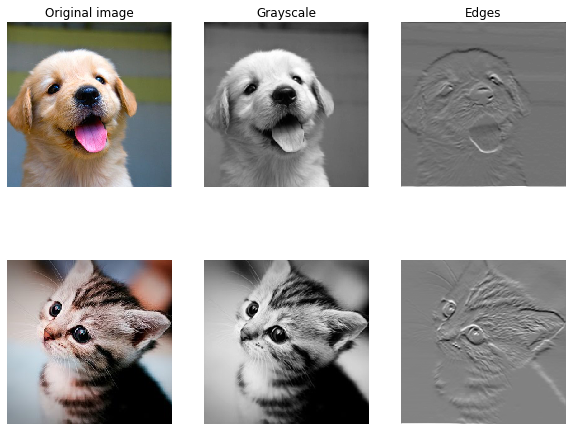

In [ ]:
from imageio import imread
from PIL import Image
from torchvision.transforms import ToTensor

kitten_url = 'https://web.eecs.umich.edu/~justincj/teaching/eecs498/assets/a3/kitten.jpg'
puppy_url = 'https://web.eecs.umich.edu/~justincj/teaching/eecs498/assets/a3/puppy.jpg'

kitten = imread(kitten_url)
puppy = imread(puppy_url)
# kitten is wide, and puppy is already squar
d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:,d//2:-d//2,:]

img_size = 200
resized_puppy = ToTensor()(Image.fromarray(puppy).resize((img_size, img_size)))
resized_kitten = ToTensor()(Image.fromarray(kitten_cropped).resize((img_size, img_size)))
x = torch.stack([resized_puppy, resized_kitten])

w = torch.zeros(2, 3, 3, 3, dtype=x.dtype)
# The first filter converts the image to grayscale.
# Set up the red, green, and blue channels of the filter.
w[0, 0, :, :] = torch.tensor([[0, 0, 0], [0, 0.3, 0], [0, 0, 0]])
w[0, 1, :, :] = torch.tensor([[0, 0, 0], [0, 0.6, 0], [0, 0, 0]])
w[0, 2, :, :] = torch.tensor([[0, 0, 0], [0, 0.1, 0], [0, 0, 0]])

# Second filter detects horizontal edges in the blue channel.
w[1, 2, :, :] = torch.tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
# Vector of biases. We don't need any bias for the grayscale
# filter, but for the edge detection filter we want to add 128
# to each output so that nothing is negative.
b = torch.tensor([0, 128], dtype=x.dtype)
# compute
out, _ = Conv.forward(x, w, b, {'stride': 1, 'pad': 1})

def imshow_no_ax(img, normalize=True):
  """ Tiny helper to show images as uint8 and remove axis labels """
  if normalize:
    img_max, img_min = img.max(), img.min()
    img = 255.0 * (img - img_min) / (img_max - img_min)
  plt.imshow(img)
  plt.gca().axis('off')

# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_no_ax(puppy, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_no_ax(out[0, 0])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_no_ax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_no_ax(kitten_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_no_ax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_no_ax(out[1, 1])
plt.show()

In [ ]:
def conv_backward(dout, cache):
  """
  A naive implementation of the backward pass for a convolutional layer.

  Inputs:
  - dout: Upstream derivatives.
  - cache: A tuple of (x, w, b, conv_param) as in conv_forward_naive

  Returns a tuple of:
  - dx: Gradient with respect to x
  - dw: Gradient with respect to w
  - db: Gradient with respect to b
  """
  dx, dw, db = None, None, None
  #############################################################################
  # TODO: Implement the convolutional backward pass.                          #
  #############################################################################
  # Replace "pass" statement with your code
  x, w, b, conv_param = cache
  N, C, H, W = x.shape
  F, _, HH, WW = w.shape
  _, _, H_, W_ = dout.shape
  pad, stride = conv_param['pad'], conv_param['stride']
  x_pad = torch.nn.functional.pad(x, (pad,pad,pad,pad)).to(x.dtype).to(x.device)

  dx_pad = torch.zeros_like(x_pad)
  dw = torch.zeros_like(w)
  db = torch.zeros_like(b)

  for img in range(N):
      for flt in range(F):
          db[flt] += torch.sum(dout[img,flt])
          for i in range(H_):
              for j in range(W_):
                  dw[flt,:,:,:] += dout[img,flt,i,j] * x_pad[img,:,i*stride:i*stride+HH,j*stride:j*stride+WW]
                  dx_pad[img,:,i*stride:i*stride+HH,j*stride:j*stride+WW] += dout[img,flt,i,j] * w[flt,:,:,:]
  dx = dx_pad[:, :, pad: H+pad, pad: W+pad]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  return dx, dw, db

Conv.backward = conv_backward

In [ ]:
fix_random_seed(0)
x = torch.randn(4, 3, 5, 5, **to_double_cuda)
w = torch.randn(2, 3, 3, 3, **to_double_cuda)
b = torch.randn(2, **to_double_cuda)
dout = torch.randn(4, 2, 5, 5, **to_double_cuda)
conv_param = {'stride': 1, 'pad': 1}

dx_num = compute_numeric_gradient(lambda x: Conv.forward(x, w, b, conv_param)[0], x, dout)
dw_num = compute_numeric_gradient(lambda w: Conv.forward(x, w, b, conv_param)[0], w, dout)
db_num = compute_numeric_gradient(lambda b: Conv.forward(x, w, b, conv_param)[0], b, dout)

out, cache = Conv.forward(x, w, b, conv_param)
dx, dw, db = Conv.backward(dout, cache)

print('Testing Conv.backward function')
print('dx error: ', rel_error(dx, dx_num))
print('dw error: ', rel_error(dw, dw_num))
print('db error: ', rel_error(db, db_num))

Testing Conv.backward function
dx error:  9.701562019554127e-09
dw error:  7.925070432746186e-10
db error:  1.5480568584027298e-10


In [ ]:
class MaxPool(object):

  @staticmethod
  def forward(x, pool_param):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

In [ ]:
def max_pool_forward(x, pool_param):
  """
  A naive implementation of the forward pass for a max-pooling layer.

  Inputs:
  - x: Input data, of shape (N, C, H, W)
  - pool_param: dictionary with the following keys:
    - 'pool_height': The height of each pooling region
    - 'pool_width': The width of each pooling region
    - 'stride': The distance between adjacent pooling regions
  No padding is necessary here.

  Returns a tuple of:
  - out: Output data, of shape (N, C, H', W') where H' and W' are given by
    H' = 1 + (H - pool_height) / stride
    W' = 1 + (W - pool_width) / stride
  - cache: (x, pool_param)
  """
  out = None
  #############################################################################
  # TODO: Implement the max-pooling forward pass                              #
  #############################################################################
  # Replace "pass" statement with your code
  N, C, H, W = x.shape
  pool_h, pool_w, stride = pool_param['pool_height'], pool_param['pool_width'], pool_param['stride']
  h_out = 1 + (H - pool_h) //stride
  w_out = 1 + (W - pool_w) //stride

  out = torch.zeros((N, C ,h_out, w_out)).to(x.dtype).to(x.device)
  for img in range(N):
      for channel in range(C):
          for i in range(h_out):
              for j in range(w_out):
                  out[img, channel, i, j] = torch.max(x[img, channel, i*stride:i*stride+pool_h, j*stride:j*stride+pool_w])
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  cache = (x, pool_param)
  return out, cache

MaxPool.forward = max_pool_forward

In [ ]:
x_shape = torch.tensor((2, 3, 4, 4))
x = torch.linspace(-0.3, 0.4, steps=torch.prod(x_shape), **to_double_cuda).reshape(*x_shape)
pool_param = {'pool_width': 2, 'pool_height': 2, 'stride': 2}

out, _ = MaxPool.forward(x, pool_param)

correct_out = torch.tensor([[[[-0.26315789, -0.24842105],
                              [-0.20421053, -0.18947368]],
                             [[-0.14526316, -0.13052632],
                              [-0.08631579, -0.07157895]],
                             [[-0.02736842, -0.01263158],
                              [ 0.03157895,  0.04631579]]],
                            [[[ 0.09052632,  0.10526316],
                              [ 0.14947368,  0.16421053]],
                             [[ 0.20842105,  0.22315789],
                              [ 0.26736842,  0.28210526]],
                             [[ 0.32631579,  0.34105263],
                              [ 0.38526316,  0.4       ]]]], **to_double_cuda)

# Compare your output with ours. Difference should be on the order of e-8.
print('Testing MaxPool.forward function:')
print('difference: ', rel_error(out, correct_out))

Testing MaxPool.forward function:
difference:  8.333332667751512e-08


In [ ]:
def max_pool_backward(dout, cache):
  """
  A naive implementation of the backward pass for a max-pooling layer.
  Inputs:
  - dout: Upstream derivatives
  - cache: A tuple of (x, pool_param) as in the forward pass.
  Returns:
  - dx: Gradient with respect to x
  """
  dx = None
  #############################################################################
  # TODO: Implement the max-pooling backward pass                             #
  #############################################################################
  # Replace "pass" statement with your code
  x, pool_param = cache
  N, C, H, W = x.shape
  pool_h, pool_w, stride = pool_param['pool_height'], pool_param['pool_width'], pool_param['stride']
  _, _, h_out, w_out = dout.shape

  dx = torch.zeros_like(x)

  for img in range(N):
      for c in range(C):
          for i in range(h_out):
              for j in range(w_out):
                  subset = x[img, c, i*stride:i*stride+pool_h,j*stride:j*stride+pool_w]
                  # 2차원에 대한 argmax도 일렬로 했을 때의 값이 나옴
                  img_idx = torch.argmax(subset)
                  x_idx = img_idx // pool_h
                  y_idx = img_idx % pool_h
                  dx[img, c, i*stride:i*stride+pool_h,j*stride:j*stride+pool_w][x_idx][y_idx] = dout[img,c,i,j]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  return dx

MaxPool.backward = max_pool_backward

In [ ]:
fix_random_seed(0)
x = torch.randn(3, 2, 8, 8, **to_double_cuda)
dout = torch.randn(3, 2, 4, 4, **to_double_cuda)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

dx_num = compute_numeric_gradient(lambda x: MaxPool.forward(x, pool_param)[0], x, dout)

out, cache = MaxPool.forward(x, pool_param)
dx = MaxPool.backward(dout, cache)

print('Testing MaxPool.backward function:')
print('dx error: ', rel_error(dx, dx_num))

Testing MaxPool.backward function:
dx error:  6.551073432532464e-12


In [ ]:
a = torch.tensor([[1,2,3],[6,4,5]])
print(torch.argmax(a))

tensor(3)


In [ ]:
class FastConv(object):

  @staticmethod
  def forward(x, w, b, conv_param):
    N, C, H, W = x.shape
    F, _, HH, WW = w.shape
    stride, pad = conv_param['stride'], conv_param['pad']
    layer = torch.nn.Conv2d(C, F, (HH, WW), stride=stride, padding=pad)
    layer.weight = torch.nn.Parameter(w)
    layer.bias = torch.nn.Parameter(b)
    tx = x.detach()
    tx.requires_grad = True
    out = layer(tx)
    cache = (x, w, b, conv_param, tx, out, layer)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    try:
      x, _, _, _, tx, out, layer = cache
      out.backward(dout)
      dx = tx.grad.detach()
      dw = layer.weight.grad.detach()
      db = layer.bias.grad.detach()
      layer.weight.grad = layer.bias.grad = None
    except RuntimeError:
      dx, dw, db = torch.zeros_like(tx), torch.zeros_like(layer.weight), torch.zeros_like(layer.bias)
    return dx, dw, db


class FastMaxPool(object):

  @staticmethod
  def forward(x, pool_param):
    N, C, H, W = x.shape
    pool_height, pool_width = pool_param['pool_height'], pool_param['pool_width']
    stride = pool_param['stride']
    layer = torch.nn.MaxPool2d(kernel_size=(pool_height, pool_width), stride=stride)
    tx = x.detach()
    tx.requires_grad = True
    out = layer(tx)
    cache = (x, pool_param, tx, out, layer)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    try:
      x, _, tx, out, layer = cache
      out.backward(dout)
      dx = tx.grad.detach()
    except RuntimeError:
      dx = torch.zeros_like(tx)
    return dx

In [ ]:
# Relative errors should be close to 0.0
fix_random_seed(0)
x = torch.randn(40, 3, 32, 32, **to_double)
dout = torch.randn(40, 3, 16, 16, **to_double)
x_cuda, dout_cuda = x.to('cuda'), dout.to('cuda')
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

t0 = time.time()
out_naive, cache_naive = MaxPool.forward(x, pool_param)
t1 = time.time()
out_fast, cache_fast = FastMaxPool.forward(x, pool_param)
t2 = time.time()
out_fast_cuda, cache_fast_cuda = FastMaxPool.forward(x_cuda, pool_param)
t3 = time.time()

print('Testing FastMaxPool.forward:')
print('Naive: %fs' % (t1 - t0))
print('Fast: %fs' % (t2 - t1))
print('Fast CUDA: %fs' % (t3 - t2))
print('Speedup: %fx' % ((t1 - t0) / (t2 - t1)))
print('Speedup CUDA: %fx' % ((t1 - t0) / (t3 - t2)))
print('Difference: ', rel_error(out_naive, out_fast))
print('Difference CUDA: ', rel_error(out_naive, out_fast_cuda.to(out_naive.device)))

t0 = time.time()
dx_naive = MaxPool.backward(dout, cache_naive)
t1 = time.time()
dx_fast = FastMaxPool.backward(dout, cache_fast)
t2 = time.time()
dx_fast_cuda = FastMaxPool.backward(dout_cuda, cache_fast_cuda)
t3 = time.time()

print('\nTesting FastMaxPool.backward:')
print('Naive: %fs' % (t1 - t0))
print('Fast: %fs' % (t2 - t1))
print('Fast CUDA: %fs' % (t3 - t2))
print('Speedup: %fx' % ((t1 - t0) / (t2 - t1)))
print('Speedup CUDA: %fx' % ((t1 - t0) / (t3 - t2)))
print('dx difference: ', rel_error(dx_naive, dx_fast))
print('dx difference CUDA: ', rel_error(dx_naive, dx_fast_cuda.to(dx_naive.device)))

Testing FastMaxPool.forward:
Naive: 0.613968s
Fast: 0.001205s
Fast CUDA: 0.000300s
Speedup: 509.631506x
Speedup CUDA: 2045.407466x
Difference:  0.0
Difference CUDA:  0.0

Testing FastMaxPool.backward:
Naive: 1.517303s
Fast: 0.000783s
Fast CUDA: 0.000437s
Speedup: 1936.710286x
Speedup CUDA: 3470.027263x
dx difference:  0.0
dx difference CUDA:  0.0


In [ ]:
class Conv_ReLU(object):

  @staticmethod
  def forward(x, w, b, conv_param):
    """
    A convenience layer that performs a convolution followed by a ReLU.
    Inputs:
    - x: Input to the convolutional layer
    - w, b, conv_param: Weights and parameters for the convolutional layer
    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    a, conv_cache = FastConv.forward(x, w, b, conv_param)
    out, relu_cache = ReLU.forward(a)
    cache = (conv_cache, relu_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    """
    Backward pass for the conv-relu convenience layer.
    """
    conv_cache, relu_cache = cache
    da = ReLU.backward(dout, relu_cache)
    dx, dw, db = FastConv.backward(da, conv_cache)
    return dx, dw, db


class Conv_ReLU_Pool(object):

  @staticmethod
  def forward(x, w, b, conv_param, pool_param):
    """
    A convenience layer that performs a convolution, a ReLU, and a pool.
    Inputs:
    - x: Input to the convolutional layer
    - w, b, conv_param: Weights and parameters for the convolutional layer
    - pool_param: Parameters for the pooling layer
    Returns a tuple of:
    - out: Output from the pooling layer
    - cache: Object to give to the backward pass
    """
    a, conv_cache = FastConv.forward(x, w, b, conv_param)
    s, relu_cache = ReLU.forward(a)
    out, pool_cache = FastMaxPool.forward(s, pool_param)
    cache = (conv_cache, relu_cache, pool_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    """
    Backward pass for the conv-relu-pool convenience layer
    """
    conv_cache, relu_cache, pool_cache = cache
    ds = FastMaxPool.backward(dout, pool_cache)
    da = ReLU.backward(ds, relu_cache)
    dx, dw, db = FastConv.backward(da, conv_cache)
    return dx, dw, db

In [ ]:
fix_random_seed(0)
x = torch.randn(2, 3, 16, 16, **to_double_cuda)
w = torch.randn(3, 3, 3, 3, **to_double_cuda)
b = torch.randn(3, **to_double_cuda)
dout = torch.randn(2, 3, 8, 8, **to_double_cuda)
conv_param = {'stride': 1, 'pad': 1}
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

out, cache = Conv_ReLU_Pool.forward(x, w, b, conv_param, pool_param)
dx, dw, db = Conv_ReLU_Pool.backward(dout, cache)

dx_num = compute_numeric_gradient(lambda x: Conv_ReLU_Pool.forward(x, w, b, conv_param, pool_param)[0], x, dout)
dw_num = compute_numeric_gradient(lambda w: Conv_ReLU_Pool.forward(x, w, b, conv_param, pool_param)[0], w, dout)
db_num = compute_numeric_gradient(lambda b: Conv_ReLU_Pool.forward(x, w, b, conv_param, pool_param)[0], b, dout)

# Relative errors should be around e-8 or less
print('Testing Conv_ReLU_Pool')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing Conv_ReLU_Pool
dx error:  2.1330122380471704e-08
dw error:  2.4734311581754782e-09
db error:  3.3151358144220166e-11


In [ ]:
fix_random_seed(0)
x = torch.randn(2, 3, 8, 8, **to_double_cuda)
w = torch.randn(3, 3, 3, 3, **to_double_cuda)
b = torch.randn(3, **to_double_cuda)
dout = torch.randn(2, 3, 8, 8, **to_double_cuda)
conv_param = {'stride': 1, 'pad': 1}

out, cache = Conv_ReLU.forward(x, w, b, conv_param)
dx, dw, db = Conv_ReLU.backward(dout, cache)

dx_num = compute_numeric_gradient(lambda x: Conv_ReLU.forward(x, w, b, conv_param)[0], x, dout)
dw_num = compute_numeric_gradient(lambda w: Conv_ReLU.forward(x, w, b, conv_param)[0], w, dout)
db_num = compute_numeric_gradient(lambda b: Conv_ReLU.forward(x, w, b, conv_param)[0], b, dout)

# Relative errors should be around e-8 or less
print('Testing Conv_ReLU:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing Conv_ReLU:
dx error:  2.601398652480065e-08
dw error:  7.922106004359444e-10
db error:  1.7982331735850437e-10


In [ ]:
class ThreeLayerConvNet(object):
  """
  A three-layer convolutional network with the following architecture:
  conv - relu - 2x2 max pool - linear - relu - linear - softmax
  The network operates on minibatches of data that have shape (N, C, H, W)
  consisting of N images, each with height H and width W and with C input
  channels.
  """

  def __init__(self, input_dims=(3, 32, 32), num_filters=32, filter_size=7,
         hidden_dim=100, num_classes=10, weight_scale=1e-3, reg=0.0,
         dtype=torch.float, device='cpu'):
    """
    Initialize a new network.
    Inputs:
    - input_dims: Tuple (C, H, W) giving size of input data
    - num_filters: Number of filters to use in the convolutional layer
    - filter_size: Width/height of filters to use in the convolutional layer
    - hidden_dim: Number of units to use in the fully-connected hidden layer
    - num_classes: Number of scores to produce from the final linear layer.
    - weight_scale: Scalar giving standard deviation for random initialization
      of weights.
    - reg: Scalar giving L2 regularization strength
    - dtype: A torch data type object; all computations will be performed using
      this datatype. float is faster but less accurate, so you should use
      double for numeric gradient checking.
    - device: device to use for computation. 'cpu' or 'cuda'
    """
    self.params = {}
    self.reg = reg
    self.dtype = dtype

    ############################################################################
    # TODO: Initialize weights and biases for the three-layer convolutional    #
    # network. Weights should be initialized from a Gaussian centered at 0.0   #
    # with standard deviation equal to weight_scale; biases should be          #
    # initialized to zero. All weights and biases should be stored in the      #
    #  dictionary self.params. Store weights and biases for the convolutional  #
    # layer using the keys 'W1' and 'b1'; use keys 'W2' and 'b2' for the       #
    # weights and biases of the hidden linear layer, and keys 'W3' and 'b3'    #
    # for the weights and biases of the output linear layer.                   #
    #                                                                          #
    # IMPORTANT: For this assignment, you can assume that the padding          #
    # and stride of the first convolutional layer are chosen so that           #
    # **the width and height of the input are preserved**. Take a look at      #
    # the start of the loss() function to see how that happens.                #               
    ############################################################################
    # Replace "pass" statement with your code
    C, H, W = input_dims
    self.params['W1'] = weight_scale * torch.randn(num_filters, C, filter_size, filter_size).to(dtype).to(device)
    self.params['b1'] = torch.zeros(num_filters).to(dtype).to(device)
    self.params['W2'] = weight_scale * torch.randn(num_filters*H*W//4, hidden_dim).to(dtype).to(device)
    self.params['b2'] = torch.zeros(hidden_dim).to(dtype).to(device)
    self.params['W3'] = weight_scale * torch.randn(hidden_dim, num_classes).to(dtype).to(device)
    self.params['b3'] = torch.zeros(num_classes).to(dtype).to(device)

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################


  def loss(self, X, y=None):
    """
    Evaluate loss and gradient for the three-layer convolutional network.
    Input / output: Same API as TwoLayerNet.
    """
    X = X.to(self.dtype)
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    W3, b3 = self.params['W3'], self.params['b3']

    # pass conv_param to the forward pass for the convolutional layer
    # Padding and stride chosen to preserve the input spatial size
    filter_size = W1.shape[2]
    conv_param = {'stride': 1, 'pad': (filter_size - 1) // 2}

    # pass pool_param to the forward pass for the max-pooling layer
    pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

    scores = None
    ############################################################################
    # TODO: Implement the forward pass for the three-layer convolutional net,  #
    # computing the class scores for X and storing them in the scores          #
    # variable.                                                                #
    #                                                                          #
    # Remember you can use the functions defined in your implementation above. #
    ############################################################################
    # Replace "pass" statement with your code
    out1, cache1 = Conv_ReLU_Pool.forward(X, W1, b1, conv_param, pool_param)
    out2, cache2 = Linear_ReLU.forward(out1, W2, b2)
    scores, cache3 = Linear.forward(out2, W3, b3)

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    if y is None:
      return scores

    loss, grads = 0.0, {}
    ############################################################################
    # TODO: Implement the backward pass for the three-layer convolutional net, #
    # storing the loss and gradients in the loss and grads variables. Compute  #
    # data loss using softmax, and make sure that grads[k] holds the gradients #
    # for self.params[k]. Don't forget to add L2 regularization!               #
    #                                                                          #
    # NOTE: To ensure that your implementation matches ours and you pass the   #
    # automated tests, make sure that your L2 regularization does not include  #
    # a factor of 0.5                                                          #
    ############################################################################
    # Replace "pass" statement with your code
    loss, dout = softmax_loss(scores, y)
    loss += self.reg * (torch.sum(W1*W1) + torch.sum(W2*W2) + torch.sum(W3*W3))
    
    dout1, grads['W3'], grads['b3'] = Linear.backward(dout, cache3)
    grads['W3'] += 2 * self.reg * W3
    dout2, grads['W2'], grads['b2'] = Linear_ReLU.backward(dout1, cache2)
    grads['W2'] += 2 * self.reg * W2
    dout3, grads['W1'], grads['b1'] = Conv_ReLU_Pool.backward(dout2, cache1)
    grads['W1'] += 2 * self.reg * W1

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    return loss, grads

In [ ]:
fix_random_seed(0)
model = ThreeLayerConvNet(**to_double_cuda)

N = 50
X = torch.randn(N, 3, 32, 32, **to_double_cuda)
y = torch.randint(10, size=(N,), **to_long_cuda)

loss, grads = model.loss(X, y)
print('Initial loss (no regularization): ', loss.item())

model.reg = 0.5
loss, grads = model.loss(X, y)
print('Initial loss (with regularization): ', loss.item())

Initial loss (no regularization):  2.3025846093194815
Initial loss (with regularization):  2.7148746692349603


In [ ]:
def save_ranking(*args):
    print(args)
save_ranking('ming', 'alice', 'tom', 'wilson', 'roy')

def save_ranking(**kwargs):
    print(kwargs)
    print(type(kwargs))
    print(kwargs['first'])
save_ranking(first='ming', second='alice', fourth='wilson', third='tom', fifth='roy')

def dict_example(A, B):
    return A*B
C = {'A' : 2, 'B':2}
print(dict_example(**C))

def sum(a,b,c):
    return a + b + c
numbers = {'0':1,'1':2,'2':3}
num = [1,2,3]
print(sum(*num))
print(sum(*numbers))

('ming', 'alice', 'tom', 'wilson', 'roy')
{'first': 'ming', 'second': 'alice', 'fourth': 'wilson', 'third': 'tom', 'fifth': 'roy'}
<class 'dict'>
ming
4
6
012


In [ ]:
num_inputs = 2
input_dims = (3, 16, 16)
reg = 0.0
num_classes = 10
fix_random_seed(0)
X = torch.randn(num_inputs, *input_dims, **to_double_cuda)
y = torch.randint(num_classes, size=(num_inputs,), **to_long_cuda)

model = ThreeLayerConvNet(num_filters=3, filter_size=3,
                          input_dims=input_dims, hidden_dim=7,
                          weight_scale=5e-2, **to_double_cuda)
loss, grads = model.loss(X, y)

for param_name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    param_grad_num = compute_numeric_gradient(f, model.params[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 2.845233e-08
W2 max relative error: 1.207800e-06
W3 max relative error: 1.893579e-09
b1 max relative error: 1.729472e-09
b2 max relative error: 1.082593e-08
b3 max relative error: 1.438167e-10


In [ ]:
help(Solver)

Help on class Solver in module coutils.solver:

class Solver(builtins.object)
 |  A Solver encapsulates all the logic necessary for training classification
 |  models. The Solver performs stochastic gradient descent using different
 |  update rules.
 |  The solver accepts both training and validation data and labels so it can
 |  periodically check classification accuracy on both training and validation
 |  data to watch out for overfitting.
 |  To train a model, you will first construct a Solver instance, passing the
 |  model, dataset, and various options (learning rate, batch size, etc) to the
 |  constructor. You will then call the train() method to run the optimization
 |  procedure and train the model.
 |  After the train() method returns, model.params will contain the parameters
 |  that performed best on the validation set over the course of training.
 |  In addition, the instance variable solver.loss_history will contain a list
 |  of all losses encountered during training and

In [ ]:
fix_random_seed(0)

num_train = 100
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

model = ThreeLayerConvNet(weight_scale=1e-3, **to_float_cuda)

solver = Solver(model, small_data,
                num_epochs=30, batch_size=50,
                update_rule=adam,
                optim_config={
                  'learning_rate': 2e-3,
                },
                verbose=True, print_every=1,
                device='cuda')
solver.train()

(Time 0.01 sec; Iteration 1 / 60) loss: 2.302585
(Epoch 0 / 30) train acc: 0.160000; val_acc: 0.098800
(Time 0.07 sec; Iteration 2 / 60) loss: 2.299701
(Epoch 1 / 30) train acc: 0.160000; val_acc: 0.098800
(Time 0.13 sec; Iteration 3 / 60) loss: 2.273117
(Time 0.14 sec; Iteration 4 / 60) loss: 2.205428
(Epoch 2 / 30) train acc: 0.160000; val_acc: 0.098800
(Time 0.19 sec; Iteration 5 / 60) loss: 2.156276
(Time 0.20 sec; Iteration 6 / 60) loss: 2.444166
(Epoch 3 / 30) train acc: 0.160000; val_acc: 0.098800
(Time 0.24 sec; Iteration 7 / 60) loss: 2.321292
(Time 0.25 sec; Iteration 8 / 60) loss: 2.174390
(Epoch 4 / 30) train acc: 0.210000; val_acc: 0.109200
(Time 0.30 sec; Iteration 9 / 60) loss: 2.148511
(Time 0.30 sec; Iteration 10 / 60) loss: 2.190450
(Epoch 5 / 30) train acc: 0.260000; val_acc: 0.136400
(Time 0.35 sec; Iteration 11 / 60) loss: 2.241007
(Time 0.36 sec; Iteration 12 / 60) loss: 2.213947
(Epoch 6 / 30) train acc: 0.290000; val_acc: 0.132400
(Time 0.40 sec; Iteration 13 / 

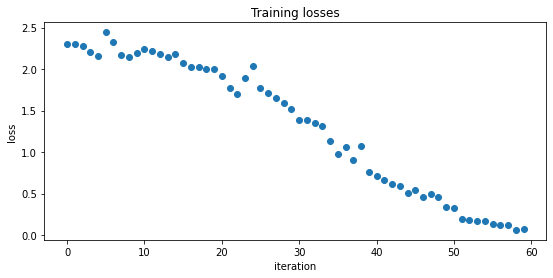

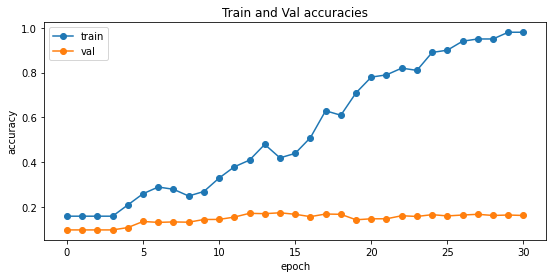

In [ ]:
plt.title('Training losses')
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.gcf().set_size_inches(9, 4)
plt.show()

plt.title('Train and Val accuracies')
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.gcf().set_size_inches(9, 4)
plt.show()

In [ ]:
fix_random_seed(0)

model = ThreeLayerConvNet(weight_scale=0.001, hidden_dim=500, reg=0.001, dtype=torch.float, device='cuda')

solver = Solver(model, data_dict,
                num_epochs=1, batch_size=64,
                update_rule=adam,
                optim_config={
                  'learning_rate': 2e-3,
                },
                verbose=True, print_every=50, device='cuda')
solver.train()

(Time 0.01 sec; Iteration 1 / 742) loss: 2.306690
(Epoch 0 / 1) train acc: 0.095000; val_acc: 0.108000
(Time 0.56 sec; Iteration 51 / 742) loss: 2.263675
(Time 1.04 sec; Iteration 101 / 742) loss: 2.100197
(Time 1.52 sec; Iteration 151 / 742) loss: 1.650206
(Time 2.01 sec; Iteration 201 / 742) loss: 1.911710
(Time 2.50 sec; Iteration 251 / 742) loss: 1.601769
(Time 2.98 sec; Iteration 301 / 742) loss: 1.583586
(Time 3.49 sec; Iteration 351 / 742) loss: 1.714970
(Time 4.00 sec; Iteration 401 / 742) loss: 1.701496
(Time 4.50 sec; Iteration 451 / 742) loss: 1.646081
(Time 4.98 sec; Iteration 501 / 742) loss: 1.523322
(Time 5.46 sec; Iteration 551 / 742) loss: 1.683857
(Time 5.95 sec; Iteration 601 / 742) loss: 1.692933
(Time 6.46 sec; Iteration 651 / 742) loss: 1.564168
(Time 6.94 sec; Iteration 701 / 742) loss: 1.511164
(Epoch 1 / 1) train acc: 0.477000; val_acc: 0.492000


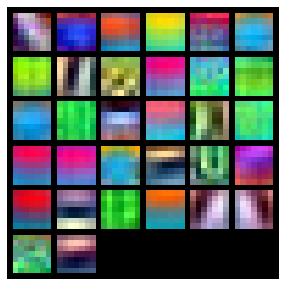

In [ ]:
from torchvision.utils import make_grid
nrow = math.ceil(math.sqrt(model.params['W1'].shape[0]))
grid = make_grid(model.params['W1'], nrow=nrow, padding=1, normalize=True, scale_each=True)
plt.imshow(grid.to(device='cpu').permute(1, 2, 0))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

In [ ]:
for i in range(1, 6):
    pass
print(i)
a = [1]
b = [2,3]
print(a + [2,4] + b)

5
[1, 2, 4, 2, 3]


In [ ]:
class DeepConvNet(object):
  """
  A convolutional neural network with an arbitrary number of convolutional
  layers in VGG-Net style. All convolution layers will use kernel size 3 and 
  padding 1 to preserve the feature map size, and all pooling layers will be
  max pooling layers with 2x2 receptive fields and a stride of 2 to halve the
  size of the feature map.

  The network will have the following architecture:
  
  {conv - [batchnorm?] - relu - [pool?]} x (L - 1) - linear

  Each {...} structure is a "macro layer" consisting of a convolution layer,
  an optional batch normalization layer, a ReLU nonlinearity, and an optional
  pooling layer. After L-1 such macro layers, a single fully-connected layer
  is used to predict the class scores.

  The network operates on minibatches of data that have shape (N, C, H, W)
  consisting of N images, each with height H and width W and with C input
  channels.
  """
  def __init__(self, input_dims=(3, 32, 32),
               num_filters=[8, 8, 8, 8, 8],
               max_pools=[0, 1, 2, 3, 4],
               batchnorm=False,
               num_classes=10, weight_scale=1e-3, reg=0.0,
               weight_initializer=None,
               dtype=torch.float, device='cpu'):
    """
    Initialize a new network.

    Inputs:
    - input_dims: Tuple (C, H, W) giving size of input data
    - num_filters: List of length (L - 1) giving the number of convolutional
      filters to use in each macro layer.
    - max_pools: List of integers giving the indices of the macro layers that
      should have max pooling (zero-indexed).
    - batchnorm: Whether to include batch normalization in each macro layer
    - num_classes: Number of scores to produce from the final linear layer.
    - weight_scale: Scalar giving standard deviation for random initialization
      of weights, or the string "kaiming" to use Kaiming initialization instead
    - reg: Scalar giving L2 regularization strength. L2 regularization should
      only be applied to convolutional and fully-connected weight matrices;
      it should not be applied to biases or to batchnorm scale and shifts.
    - dtype: A torch data type object; all computations will be performed using
      this datatype. float is faster but less accurate, so you should use
      double for numeric gradient checking.
    - device: device to use for computation. 'cpu' or 'cuda'    
    """
    self.params = {}
    self.num_layers = len(num_filters)+1
    self.max_pools = max_pools
    self.batchnorm = batchnorm
    self.reg = reg
    self.dtype = dtype
  
    if device == 'cuda':
      device = 'cuda:0'
    
    ############################################################################
    # TODO: Initialize the parameters for the DeepConvNet. All weights,        #
    # biases, and batchnorm scale and shift parameters should be stored in the #
    # dictionary self.params.                                                  #
    #                                                                          #
    # Weights for conv and fully-connected layers should be initialized        #
    # according to weight_scale. Biases should be initialized to zero.         #
    # Batchnorm scale (gamma) and shift (beta) parameters should be initilized #
    # to ones and zeros respectively.                                          #           
    ############################################################################
    # Replace "pass" statement with your code
    C, H, W = input_dims
    layers_dims = [C] + num_filters + [num_classes]

    for i in range(1, len(num_filters)+1):
        if weight_scale == "kaiming":
            self.params['W'+str(i)] = kaiming_initializer(layers_dims[i-1], layers_dims[i], K=3, 
                                                          relu=True, device=device,dtype=dtype)
        else:
            self.params['W'+str(i)] = weight_scale * torch.randn(layers_dims[i],layers_dims[i-1], 3, 3).to(dtype).to(device)
        self.params['b'+str(i)] = torch.zeros(layers_dims[i]).to(dtype).to(device)
        if self.batchnorm:
            self.params['gamma'+str(i)] = torch.ones(layers_dims[i]).to(dtype).to(device)
            self.params['beta'+str(i)] = torch.zeros(layers_dims[i]).to(dtype).to(device)
    i += 1
    downsample_rate = 2 **(len(self.max_pools))
    if weight_scale == "kaiming":
        self.params['W'+str(i)] = kaiming_initializer(layers_dims[i-1]*H*W//downsample_rate**2,
                                                      layers_dims[i], K=None, 
                                                      relu=False, device=device,dtype=dtype)
    else:
        self.params['W'+str(i)] = weight_scale * torch.randn(layers_dims[i-1]*H*W//downsample_rate**2, layers_dims[i]).to(dtype).to(device)
    self.params['b'+str(i)] = torch.zeros(layers_dims[i]).to(dtype).to(device)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    # With batch normalization we need to keep track of running means and
    # variances, so we need to pass a special bn_param object to each batch
    # normalization layer. You should pass self.bn_params[0] to the forward pass
    # of the first batch normalization layer, self.bn_params[1] to the forward
    # pass of the second batch normalization layer, etc.
    self.bn_params = []
    if self.batchnorm:
      self.bn_params = [{'mode': 'train'} for _ in range(len(num_filters))]
      
    # Check that we got the right number of parameters
    if not self.batchnorm:
      params_per_macro_layer = 2  # weight and bias
    else:
      params_per_macro_layer = 4  # weight, bias, scale, shift
    num_params = params_per_macro_layer * len(num_filters) + 2
    msg = 'self.params has the wrong number of elements. Got %d; expected %d'
    msg = msg % (len(self.params), num_params)
    assert len(self.params) == num_params, msg

    # Check that all parameters have the correct device and dtype:
    for k, param in self.params.items():
      msg = 'param "%s" has device %r; should be %r' % (k, param.device, device)
      assert param.device == torch.device(device), msg
      msg = 'param "%s" has dtype %r; should be %r' % (k, param.dtype, dtype)
      assert param.dtype == dtype, msg

  def loss(self, X, y=None):
    """
    Evaluate loss and gradient for the deep convolutional network.
    Input / output: Same API as ThreeLayerConvNet.
    """
    X = X.to(self.dtype)
    mode = 'test' if y is None else 'train'

    # Set train/test mode for batchnorm params since they
    # behave differently during training and testing.
    if self.batchnorm:
      for bn_param in self.bn_params:
        bn_param['mode'] = mode
    scores = None

    # pass conv_param to the forward pass for the convolutional layer
    # Padding and stride chosen to preserve the input spatial size
    filter_size = 3
    conv_param = {'stride': 1, 'pad': (filter_size - 1) // 2}

    # pass pool_param to the forward pass for the max-pooling layer
    pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

    scores = None
    ############################################################################
    # TODO: Implement the forward pass for the DeepConvNet, computing the      #
    # class scores for X and storing them in the scores variable.              #
    #                                                                          #
    # You should use the fast versions of convolution and max pooling layers,  #
    # or the convolutional sandwich layers, to simplify your implementation.   #
    ############################################################################
    # Replace "pass" statement with your code
    scores = X
    cache_history = []
    L2reg = 0
    for i in range(self.num_layers - 1):
        w = self.params['W' + str(i + 1)]
        b = self.params['b' + str(i + 1)]
        L2reg += torch.sum(w ** 2)
        if i in self.max_pools:
            if self.batchnorm:
                scores, cache = Conv_BatchNorm_ReLU_Pool.forward(scores, w, b, self.params['gamma'+str(i + 1)],
                                          self.params['beta'+str(i + 1)], conv_param,
                                          self.bn_params[i], pool_param)
                cache_history.append(cache)
            else:
                scores, cache = Conv_ReLU_Pool.forward(scores, w, b, conv_param, pool_param)
                cache_history.append(cache)
        else:
            if self.batchnorm:
                scores, cache = Conv_BatchNorm_ReLU.forward(scores, w, b, self.params['gamma'+str(i + 1)],
                                          self.params['beta'+str(i + 1)], conv_param,
                                          self.bn_params[i])
                cache_history.append(cache)
            else:
                scores, cache = Conv_ReLU.forward(scores, w, b, conv_param)
                cache_history.append(cache)

    # linear
    i += 1
    scores, cache = Linear.forward(scores, self.params['W' + str(i+1)],self.params['b' + str(i+1)])
    cache_history.append(cache)
    L2reg += torch.sum(self.params['W' + str(i+1)] ** 2)
    L2reg *= self.reg
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    if y is None:
      return scores

    loss, grads = 0, {}
    ############################################################################
    # TODO: Implement the backward pass for the DeepConvNet, storing the loss  #
    # and gradients in the loss and grads variables. Compute data loss using   #
    # softmax, and make sure that grads[k] holds the gradients for             #
    # self.params[k]. Don't forget to add L2 regularization!                   #
    #                                                                          #
    # NOTE: To ensure that your implementation matches ours and you pass the   #
    # automated tests, make sure that your L2 regularization does not include  #
    # a factor of 0.5                                                          #
    #######################################################'W'#####################
    # Replace "pass" statement with your code
    loss, d_out = softmax_loss(scores, y)
    loss +=  L2reg
    d_out, grads['W' + str(i + 1)], grads['b' + str(i + 1)] = Linear.backward(d_out, cache_history.pop())
    grads['W' + str(i + 1)] += 2 * self.reg * self.params['W'+str(i + 1)]
    i -= 1
    while i >= 0:
        if i in self.max_pools:
            if self.batchnorm:
                d_out, dw, db, dgamma, dbeta = Conv_BatchNorm_ReLU_Pool.backward(d_out, cache_history.pop())
                grads['gamma' + str(i + 1)] = dgamma
                grads['beta' + str(i + 1)] = dbeta
                grads['b' + str(i + 1)] = db
                grads['W' + str(i + 1)] = dw + 2 * self.reg * self.params['W' + str(i + 1)]
            else:
                d_out, dw, db = Conv_ReLU_Pool.backward(d_out, cache_history.pop())
                grads['b' + str(i + 1)] = db
                grads['W' + str(i + 1)] = dw + 2 * self.reg * self.params['W' + str(i + 1)]
        else:
            if self.batchnorm:
                d_out, dw, db, dgamma, dbeta = Conv_BatchNorm_ReLU.backward(d_out, cache_history.pop())
                grads['gamma' + str(i + 1)] = dgamma
                grads['beta' + str(i + 1)] = dbeta
                grads['b' + str(i + 1)] = db
                grads['W' + str(i + 1)] = dw + 2 * self.reg * self.params['W' + str(i + 1)]
            else:
                d_out, dw, db = Conv_ReLU.backward(d_out, cache_history.pop())
                grads['b' + str(i + 1)] = db
                grads['W' + str(i + 1)] = dw + 2 * self.reg * self.params['W' + str(i + 1)]
        i -= 1
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    return loss, grads

In [ ]:
fix_random_seed(0)
input_dims = (3, 32, 32)
model = DeepConvNet(num_filters=[8, 64], max_pools=[0, 1], **to_double_cuda)

N = 50
X = torch.randn(N, *input_dims, **to_double_cuda)
y = torch.randint(10, size=(N,), **to_long_cuda)

loss, grads = model.loss(X, y)
print('Initial loss (no regularization): ', loss.item())

model.reg = 1.
loss, grads = model.loss(X, y)
print('Initial loss (with regularization): ', loss.item())

Initial loss (no regularization):  2.302584820952504
Initial loss (with regularization):  2.3484235261662056


In [ ]:
num_inputs = 2
input_dims = (3, 8, 8)
num_classes = 10
fix_random_seed(0)
X = torch.randn(num_inputs, *input_dims, **to_double_cuda)
y = torch.randint(num_classes, size=(num_inputs,), **to_long_cuda)

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = DeepConvNet(input_dims=input_dims, num_classes=num_classes,
                      num_filters=[8, 8, 8],
                      max_pools=[0, 2],
                      reg=reg,
                      weight_scale=5e-2, **to_double_cuda)

  loss, grads = model.loss(X, y)
  # The relative errors should be up to the order of e-6
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = compute_numeric_gradient(f, model.params[name])
    print('%s max relative error: %e' % (name, rel_error(grad_num, grads[name])))
  if reg == 0: print()

KeyboardInterrupt: ignored

(Time 0.01 sec; Iteration 1 / 150) loss: 6.393856
(Epoch 0 / 30) train acc: 0.180000; val_acc: 0.079600
(Epoch 1 / 30) train acc: 0.140000; val_acc: 0.110000
(Epoch 2 / 30) train acc: 0.120000; val_acc: 0.113600
(Time 0.30 sec; Iteration 11 / 150) loss: 2.628291
(Epoch 3 / 30) train acc: 0.160000; val_acc: 0.123200
(Epoch 4 / 30) train acc: 0.180000; val_acc: 0.120000
(Time 0.52 sec; Iteration 21 / 150) loss: 2.274069
(Epoch 5 / 30) train acc: 0.200000; val_acc: 0.130000
(Epoch 6 / 30) train acc: 0.160000; val_acc: 0.093600
(Time 0.75 sec; Iteration 31 / 150) loss: 2.279524
(Epoch 7 / 30) train acc: 0.160000; val_acc: 0.093600
(Epoch 8 / 30) train acc: 0.160000; val_acc: 0.093600
(Time 0.98 sec; Iteration 41 / 150) loss: 2.266952
(Epoch 9 / 30) train acc: 0.160000; val_acc: 0.093600
(Epoch 10 / 30) train acc: 0.160000; val_acc: 0.093600
(Time 1.20 sec; Iteration 51 / 150) loss: 2.275383
(Epoch 11 / 30) train acc: 0.160000; val_acc: 0.093600
(Epoch 12 / 30) train acc: 0.160000; val_acc:

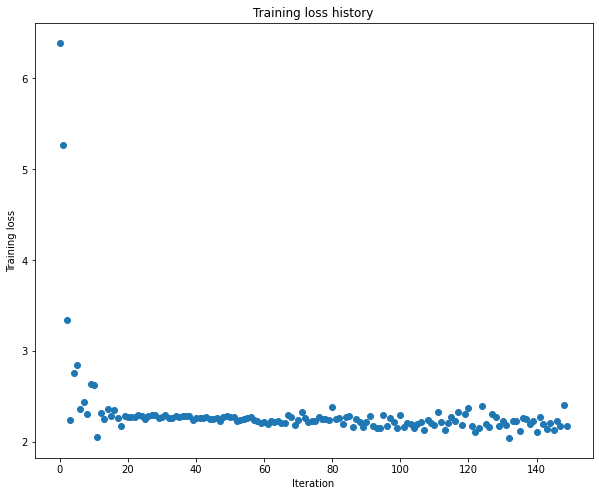

In [ ]:
# TODO: Use a DeepConvNet to overfit 50 training examples by 
# tweaking just the learning rate and initialization scale.
fix_random_seed(0)

num_train = 50
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = small_data['X_train'].shape[1:]

weight_scale = 2e-3   # Experiment with this!
learning_rate = 1e-5  # Experiment with this!
############################################################################
# TODO: Change weight_scale and learning_rate so your model achieves 100%  #
# training accuracy within 30 epochs.                                      #
############################################################################
# Replace "pass" statement with your code
weight_scale = 2e-1
learning_rate = 1e-2
############################################################################
#                             END OF YOUR CODE                             #
############################################################################
model = DeepConvNet(input_dims=input_dims, num_classes=10,
                    num_filters=[8, 16, 32, 64],
                    max_pools=[0, 1, 2, 3],
                    reg=1e-5, weight_scale=weight_scale, **to_float_cuda)
solver = Solver(model, small_data,
                print_every=10, num_epochs=30, batch_size=10,
                update_rule=adam,
                optim_config={
                  'learning_rate': learning_rate,
                },
                device='cuda',
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

In [ ]:
# 밑에 kaiming_initializer에서 Din 은 input_channels * k* k 이다.(즉, 필터 하나의 크기)

In [ ]:
def kaiming_initializer(Din, Dout, K=None, relu=True, device='cpu',
                        dtype=torch.float32):
  """
  Implement Kaiming initialization for linear and convolution layers.
  
  Inputs:
  - Din, Dout: Integers giving the number of input and output dimensions for
    this layer
  - K: If K is None, then initialize weights for a linear layer with Din input
    dimensions and Dout output dimensions. Otherwise if K is a nonnegative
    integer then initialize the weights for a convolution layer with Din input
    channels, Dout output channels, and a kernel size of KxK.
  - relu: If ReLU=True, then initialize weights with a gain of 2 to account for
    a ReLU nonlinearity (Kaiming initializaiton); otherwise initialize weights
    with a gain of 1 (Xavier initialization).
  - device, dtype: The device and datatype for the output tensor.

  Returns:
  - weight: A torch Tensor giving initialized weights for this layer. For a
    linear layer it should have shape (Din, Dout); for a convolution layer it
    should have shape (Dout, Din, K, K).
  """
  gain = 2. if relu else 1.
  weight = None
  if K is None:
    ###########################################################################
    # TODO: Implement Kaiming initialization for linear layer.                #
    # The weight scale is sqrt(gain / fan_in),                                #
    # where gain is 2 if ReLU is followed by the layer, or 1 if not,          #
    # and fan_in = num_in_channels (= Din).                                   #
    # The output should be a tensor in the designated size, dtype, and device.#
    ###########################################################################
    # Replace "pass" statement with your code
    weight = (gain/Din) ** (1/2) *torch.randn(Din, Dout, dtype=dtype, device=device) 
    ###########################################################################
    #                            END OF YOUR CODE                             #
    ###########################################################################
  else:
    ###########################################################################
    # TODO: Implement Kaiming initialization for convolutional layer.         #
    # The weight scale is sqrt(gain / fan_in),                                #
    # where gain is 2 if ReLU is followed by the layer, or 1 if not,          #
    # and fan_in = num_in_channels (= Din) * K * K                            #
    # The output should be a tensor in the designated size, dtype, and device.#
    ###########################################################################
    # Replace "pass" statement with your code
    weight = (gain/(Din*K*K)) ** (1/2) * torch.randn(Dout, Din, K, K, dtype = dtype, device=device)
    ###########################################################################
    #                            END OF YOUR CODE                             #
    ###########################################################################
  return weight    

In [ ]:
fix_random_seed(0)

# Try training a deep convolutional net with different weight initialization methods
num_train = 10000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = data_dict['X_train'].shape[1:]

weight_scales = ['kaiming', 1e-1, 1e-2, 1e-3]

solvers = []
for weight_scale in weight_scales:
  print('Solver with weight scale: ', weight_scale)
  model = DeepConvNet(input_dims=input_dims, num_classes=10,
                      num_filters=([8] * 10) + ([32] * 10) + ([128] * 10),
                      max_pools=[9, 19],
                      weight_scale=weight_scale,
                      reg=1e-5, **to_float_cuda)

  solver = Solver(model, small_data,
                  num_epochs=1, batch_size=128,
                  update_rule=sgd_momentum,
                  optim_config={
                    'learning_rate': 2e-3,
                  },
                  print_every=20, device='cuda')
  solver.train()
  solvers.append(solver)

Solver with weight scale:  kaiming


IndexError: ignored

In [ ]:
def plot_training_history_init(title, xlabel, solvers, labels, plot_fn, marker='-o'):
  plt.title(title)
  plt.xlabel(xlabel)
  for solver, label in zip(solvers, labels):    
    data = plot_fn(solver)
    label = 'weight_scale=' + str(label)
    plt.plot(data, marker, label=label)
  plt.legend(loc='lower center', ncol=len(solvers))

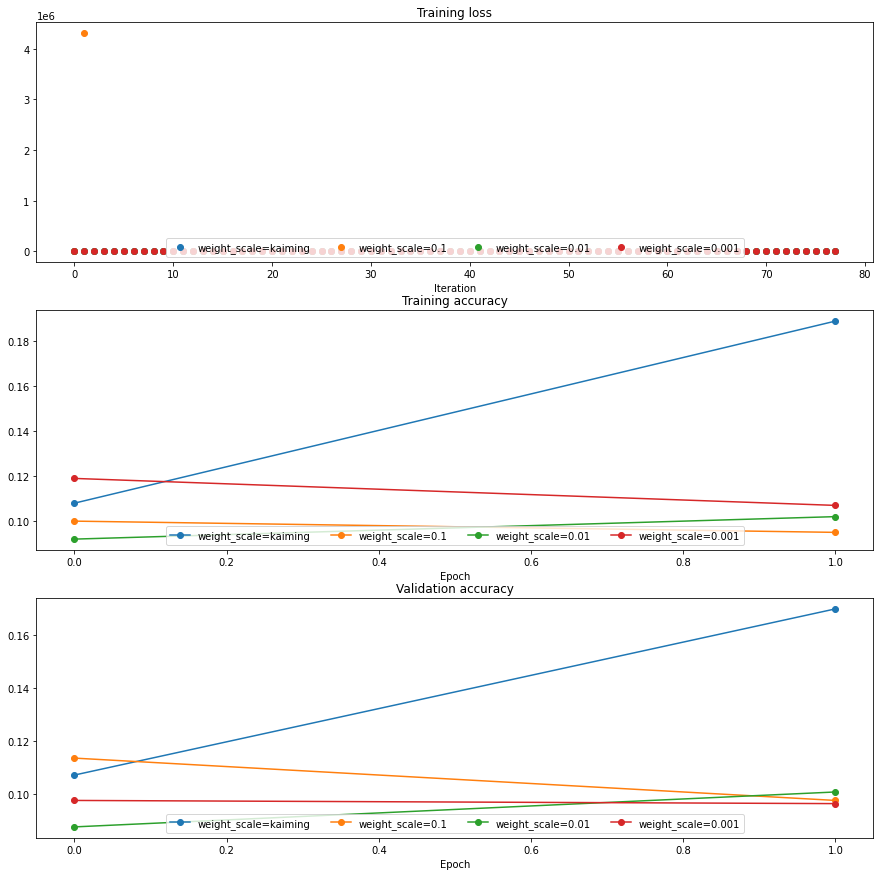

In [ ]:
plt.subplot(3, 1, 1)
plot_training_history_init('Training loss','Iteration', solvers, weight_scales,
                            lambda x: x.loss_history, marker='o')
plt.subplot(3, 1, 2)
plot_training_history_init('Training accuracy','Epoch', solvers, weight_scales,
                           lambda x: x.train_acc_history)
plt.subplot(3, 1, 3)
plot_training_history_init('Validation accuracy','Epoch', solvers, weight_scales,
                           lambda x: x.val_acc_history)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [ ]:
input_dims = data_dict['X_train'].shape[1:]
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

model = None
solver = None
################################################################################
# TODO: Train the best DeepConvNet that you can on CIFAR-10 within 60 seconds. #
################################################################################
# Replace "pass" statement with your code
data = {
  'X_train': data_dict['X_train'],
  'y_train': data_dict['y_train'],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

flt = [64,64,128,128,256,256]
num_epochs = 50
lr = 1e-3
reg = 1e-3
model = DeepConvNet(input_dims=input_dims, num_classes=10,
                        num_filters = flt,
                        max_pools=[1,3,5],
                        weight_scale='kaiming',
                        batchnorm=False,
                        reg=reg, **to_float_cuda)

solver = Solver(model, data_dict,
                print_every=50, num_epochs=num_epochs, batch_size=150,
                update_rule=adam,
                optim_config={
                  'learning_rate': lr,
                },
                device='cuda',
         )
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
solver.train(time_limit=60)

torch.backends.cudnn.benchmark = False

(Time 0.04 sec; Iteration 1 / 15800) loss: 4.136222
(Epoch 0 / 50) train acc: 0.124000; val_acc: 0.116000
(Time 2.66 sec; Iteration 51 / 15800) loss: 2.950375
(Time 4.94 sec; Iteration 101 / 15800) loss: 2.219385
(Time 7.24 sec; Iteration 151 / 15800) loss: 2.019109
(Time 9.56 sec; Iteration 201 / 15800) loss: 1.824739
(Time 11.83 sec; Iteration 251 / 15800) loss: 1.855680
(Time 14.10 sec; Iteration 301 / 15800) loss: 1.746472
(Epoch 1 / 50) train acc: 0.573000; val_acc: 0.590400
(Time 16.72 sec; Iteration 351 / 15800) loss: 1.658387
(Time 19.01 sec; Iteration 401 / 15800) loss: 1.476506
(Time 21.31 sec; Iteration 451 / 15800) loss: 1.507012
(Time 23.56 sec; Iteration 501 / 15800) loss: 1.434314
(Time 25.81 sec; Iteration 551 / 15800) loss: 1.230269
(Time 28.08 sec; Iteration 601 / 15800) loss: 1.160001
(Epoch 2 / 50) train acc: 0.693000; val_acc: 0.722000
(Time 30.71 sec; Iteration 651 / 15800) loss: 1.100213
(Time 32.96 sec; Iteration 701 / 15800) loss: 1.200331
(Time 35.22 sec; Iter

In [ ]:
print('Validation set accuracy: ', solver.check_accuracy(data_dict['X_val'], data_dict['y_val']))
print('Test set accuracy: ', solver.check_accuracy(data_dict['X_test'], data_dict['y_test']))

Validation set accuracy:  0.7791999578475952
Test set accuracy:  0.7594999670982361


In [ ]:
class BatchNorm(object):

  @staticmethod
  def forward(x, gamma, beta, bn_param):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

  @staticmethod
  def backward_alt(dout, cache):
    raise NotImplementedError

In [ ]:
def batchnorm_forward(x, gamma, beta, bn_param):
  """
  Forward pass for batch normalization.

  During training the sample mean and (uncorrected) sample variance are
  computed from minibatch statistics and used to normalize the incoming data.
  During training we also keep an exponentially decaying running mean of the
  mean and variance of each feature, and these averages are used to normalize
  data at test-time.

  At each timestep we update the running averages for mean and variance using
  an exponential decay based on the momentum parameter:

  running_mean = momentum * running_mean + (1 - momentum) * sample_mean
  running_var = momentum * running_var + (1 - momentum) * sample_var

  Note that the batch normalization paper suggests a different test-time
  behavior: they compute sample mean and variance for each feature using a
  large number of training images rather than using a running average. For
  this implementation we have chosen to use running averages instead since
  they do not require an additional estimation step; the PyTorch
  implementation of batch normalization also uses running averages.

  Input:
  - x: Data of shape (N, D)
  - gamma: Scale parameter of shape (D,)
  - beta: Shift paremeter of shape (D,)
  - bn_param: Dictionary with the following keys:
    - mode: 'train' or 'test'; required
    - eps: Constant for numeric stability
    - momentum: Constant for running mean / variance.
    - running_mean: Array of shape (D,) giving running mean of features
    - running_var Array of shape (D,) giving running variance of features

  Returns a tuple of:
  - out: of shape (N, D)
  - cache: A tuple of values needed in the backward pass
  """
  mode = bn_param['mode']
  eps = bn_param.get('eps', 1e-5)
  momentum = bn_param.get('momentum', 0.9)

  N, D = x.shape
  running_mean = bn_param.get('running_mean', torch.zeros(D, dtype=x.dtype, device=x.device))
  running_var = bn_param.get('running_var', torch.zeros(D, dtype=x.dtype, device=x.device))

  out, cache = None, None
  if mode == 'train':
    #######################################################################
    # TODO: Implement the training-time forward pass for batch norm.      #
    # Use minibatch statistics to compute the mean and variance, use      #
    # these statistics to normalize the incoming data, and scale and      #
    # shift the normalized data using gamma and beta.                     #
    #                                                                     #
    # You should store the output in the variable out. Any intermediates  #
    # that you need for the backward pass should be stored in the cache   #
    # variable.                                                           #
    #                                                                     #
    # You should also use your computed sample mean and variance together #
    # with the momentum variable to update the running mean and running   #
    # variance, storing your result in the running_mean and running_var   #
    # variables.                                                          #
    #                                                                     #
    # Note that though you should be keeping track of the running         #
    # variance, you should normalize the data based on the standard       #
    # deviation (square root of variance) instead!                        # 
    # Referencing the original paper (https://arxiv.org/abs/1502.03167)   #
    # might prove to be helpful.                                          #
    #######################################################################
    # Replace "pass" statement with your code
    mean = torch.mean(x, dim=0)
    var = 1. / N * torch.sum((x-mean)**2, 0)
    x_norm = (x - mean) / ((var + eps) ** 0.5)
    # scale and shift
    out = gamma * x_norm + beta
    # track
    running_mean = momentum * running_mean + (1 - momentum) * mean
    running_var = momentum * running_var + (1 - momentum) * var

    cache = {"gamma": gamma, "eps":eps, "beta": beta, "data":x,\
             "mode": "train", "runing_mean": running_mean, "running_var": running_var,\
             "var":var,"x_norm":x_norm, "mean":mean}
    #######################################################################
    #                           END OF YOUR CODE                          #
    #######################################################################
  elif mode == 'test':
    #######################################################################
    # TODO: Implement the test-time forward pass for batch normalization. #
    # Use the running mean and variance to normalize the incoming data,   #
    # then scale and shift the normalized data using gamma and beta.      #
    # Store the result in the out variable.                               #
    #######################################################################
    # Replace "pass" statement with your code
    x_norm = (x - running_mean) / ((running_var + eps) ** 0.5)
    cache = {"gamma": gamma, "eps":eps, "beta": beta, "data":x,\
             "mode": "test", "running_mean": running_mean, "running_var": running_var,\
             "x_norm":x_norm}
    out = gamma * x_norm + beta
    #######################################################################
    #                           END OF YOUR CODE                          #
    #######################################################################
  else:
    raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

  # Store the updated running means back into bn_param
  bn_param['running_mean'] = running_mean.detach()
  bn_param['running_var'] = running_var.detach()

  return out, cache

BatchNorm.forward = batchnorm_forward

In [ ]:
# Check the training-time forward pass by checking means and variances
# of features both before and after batch normalization   
def print_mean_std(x,dim=0):
  means = ['%.3f' % xx for xx in x.mean(dim=dim).tolist()]
  stds = ['%.3f' % xx for xx in x.std(dim=dim).tolist()]
  print('  means: ', means)
  print('  stds:  ', stds)
  print()

# Simulate the forward pass for a two-layer network
fix_random_seed(0)
N, D1, D2, D3 = 200, 50, 60, 3
X = torch.randn(N, D1, **to_double_cuda)
W1 = torch.randn(D1, D2, **to_double_cuda)
W2 = torch.randn(D2, D3, **to_double_cuda)
a = X.matmul(W1).clamp(min=0.).matmul(W2)

print('Before batch normalization:')
print_mean_std(a,dim=0)

# Run with gamma=1, beta=0. Means should be close to zero and stds close to one
gamma = torch.ones(D3, **to_double_cuda)
beta = torch.zeros(D3, **to_double_cuda)
print('After batch normalization (gamma=1, beta=0)')
a_norm, _ = BatchNorm.forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm,dim=0)

# Run again with nontrivial gamma and beta. Now means should be close to beta
# and std should be close to gamma.
gamma = torch.tensor([1.0, 2.0, 3.0], **to_double_cuda)
beta = torch.tensor([11.0, 12.0, 13.0], **to_double_cuda)
print('After batch normalization (gamma=', gamma.tolist(), ', beta=', beta.tolist(), ')')
a_norm, _ = BatchNorm.forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm,dim=0)

Before batch normalization:
  means:  ['52.046', '11.122', '10.243']
  stds:   ['34.646', '30.732', '39.429']

After batch normalization (gamma=1, beta=0)
  means:  ['0.000', '0.000', '0.000']
  stds:   ['1.003', '1.003', '1.003']

After batch normalization (gamma= [1.0, 2.0, 3.0] , beta= [11.0, 12.0, 13.0] )
  means:  ['11.000', '12.000', '13.000']
  stds:   ['1.003', '2.005', '3.008']



In [ ]:
fix_random_seed(0)
N, D1, D2, D3 = 200, 50, 60, 3
W1 = torch.randn(D1, D2, **to_double_cuda)
W2 = torch.randn(D2, D3, **to_double_cuda)

bn_param = {'mode': 'train'}
gamma = torch.ones(D3, **to_double_cuda)
beta = torch.zeros(D3, **to_double_cuda)

for t in range(500):
  X = torch.randn(N, D1, **to_double_cuda)
  a = X.matmul(W1).clamp(min=0.).matmul(W2)
  BatchNorm.forward(a, gamma, beta, bn_param)

bn_param['mode'] = 'test'
X = torch.randn(N, D1, **to_double_cuda)
a = X.matmul(W1).clamp(min=0.).matmul(W2)
a_norm, _ = BatchNorm.forward(a, gamma, beta, bn_param)

# Means should be close to zero and stds close to one, but will be
# noisier than training-time forward passes.
print('After batch normalization (test-time):')
print_mean_std(a_norm,dim=0)

After batch normalization (test-time):
  means:  ['0.031', '-0.051', '0.061']
  stds:   ['1.011', '0.958', '1.068']



In [ ]:
def batchnorm_backward(dout, cache):
  """
  Backward pass for batch normalization.

  For this implementation, you should write out a computation graph for
  batch normalization on paper and propagate gradients backward through
  intermediate nodes.

  Inputs:
  - dout: Upstream derivatives, of shape (N, D)
  - cache: Variable of intermediates from batchnorm_forward.

  Returns a tuple of:
  - dx: Gradient with respect to inputs x, of shape (N, D)
  - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
  - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
  """
  dx, dgamma, dbeta = None, None, None
  ###########################################################################
  # TODO: Implement the backward pass for batch normalization. Store the    #
  # results in the dx, dgamma, and dbeta variables.                         #
  # Referencing the original paper (https://arxiv.org/abs/1502.03167)       #
  # might prove to be helpful.                                              #
  # Don't forget to implement train and test mode separately.               #
  ###########################################################################
  # Replace "pass" statement with your code
  #
  # https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html
  #
  N, D = dout.shape
  N = N * 1.0
  mode = cache['mode']
  beta, gamma, x, eps, = cache['beta'], cache['gamma'], cache['data'], cache['eps']
  mean, var, x_norm = cache['mean'], cache['var'], cache['x_norm']
  if mode == 'train':
    dbeta = torch.sum(dout, dim=0)
    dgamma = torch.sum(dout * x_norm, dim=0)
    dx_norm = dout * gamma
    std = (var + eps) ** 0.5
    ivar = 1 / std
    dx_mu1 = dx_norm / std
    divar = torch.sum(dx_norm * (x-mean), dim=0)
    dvar = (-0.5) * ((var+eps) ** (-1.5)) * divar

    dsq = 1 / N  * dvar # * torch.ones_like(data)
    dx_mu2 = 2 * (x - mean) * dsq
    
    dx1 = dx_mu1 + dx_mu2
    dmu = torch.sum(-dx1, dim=0)
    
    dx2 = 1 / N * dmu # broadcast or not? * torch.ones_like(data) 
    
    dx = dx1 + dx2



  elif mode == 'test':
    r_mean = cache['running_mean']
    r_val = cache['running_var']
    eps = cache['eps']
    dbeta = 1. * torch.sum(dout, dim=0)
    dgamma = torch.sum((x-running_mean)/(running_var + eps)**0.5 * dout, dim=0)
    dx = gamma / ((r_val + eps) ** 0.5)

  ##########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return dx, dgamma, dbeta

BatchNorm.backward = batchnorm_backward

In [ ]:
# Gradient check batchnorm backward pass
fix_random_seed(0)
N, D = 4, 5
x = 5 * torch.randn(N, D, **to_double_cuda) + 12
gamma = torch.randn(D, **to_double_cuda)
beta = torch.randn(D, **to_double_cuda)
dout = torch.randn(N, D, **to_double_cuda)

bn_param = {'mode': 'train'}
fx = lambda x: BatchNorm.forward(x, gamma, beta, bn_param)[0]
fg = lambda a: BatchNorm.forward(x, a, beta, bn_param)[0]
fb = lambda b: BatchNorm.forward(x, gamma, b, bn_param)[0]

dx_num = compute_numeric_gradient(fx, x, dout)
da_num = compute_numeric_gradient(fg, gamma.clone(), dout)
db_num = compute_numeric_gradient(fb, beta.clone(), dout)

_, cache = BatchNorm.forward(x, gamma, beta, bn_param)
dx, dgamma, dbeta = BatchNorm.backward(dout, cache)
# You should expect to see relative errors between 1e-12 and 1e-9
print('dx error: ', rel_error(dx_num, dx))
print('dgamma error: ', rel_error(da_num, dgamma))
print('dbeta error: ', rel_error(db_num, dbeta))

dx error:  1.1855892148140485e-09
dgamma error:  9.66697325429414e-12
dbeta error:  1.285238313552545e-11


In [ ]:
def batchnorm_backward_alt(dout, cache):
  """
  Alternative backward pass for batch normalization.
  For this implementation you should work out the derivatives for the batch
  normalizaton backward pass on paper and simplify as much as possible. You
  should be able to derive a simple expression for the backward pass. 
  See the jupyter notebook for more hints.
   
  Note: This implementation should expect to receive the same cache variable
  as batchnorm_backward, but might not use all of the values in the cache.

  Inputs / outputs: Same as batchnorm_backward
  """
  dx, dgamma, dbeta = None, None, None
  ###########################################################################
  # TODO: Implement the backward pass for batch normalization. Store the    #
  # results in the dx, dgamma, and dbeta variables.                         #
  #                                                                         #
  # After computing the gradient with respect to the centered inputs, you   #
  # should be able to compute gradients with respect to the inputs in a     #
  # single statement; our implementation fits on a single 80-character line.#
  ###########################################################################
  # Replace "pass" statement with your code
  beta, gamma, x, eps= cache['beta'], cache['gamma'], cache['data'], cache['eps']  
  var, mean, x_norm = cache['var'], cache['mean'], cache['x_norm']
  N = dout.shape[0]
  std = (var + eps) ** 0.5
  dbeta = 1.0 *torch.sum(dout, dim=0)
  dgamma = torch.sum(dout * x_norm, dim=0)
  '''
  dL_dy = gamma * dout?
  dY_dstd = torch.sum((data - mean) * (-1) * (1 / (std **2)), dim=0)
  dY_dmean = -1. * (1/std) * ((torch.ones_like(data)).sum(dim=0))
                              
  dstd_dv = 0.5 * (var + eps) ** (-0.5) = 1/std
  dv_dx = 1 / total * 2 * (data - mean)
  dmean_dx = 1 / total * torch.ones_like(data)
  dv_dmean = 1 / total * (-2) * (data - mean).sum(dim=0)            # 이게 0인 듯 ㅠ..모르겠다                 
  
  dL_dx = dL_dy * (dY_dstd * dstd_dv * (dv_dx + (dv_dmean * dmean_dx)==0)+ dY_dmean * dmean_dx)
  '''
  std = (var + eps) ** 0.5
  dmu = torch.sum(dout, dim=0)/N
  dvar = 2/N * torch.sum((x-mean)*dout, dim=0)
  dstd = dvar/(2*std)
  dx = gamma*(-dstd*(x-mean) + (dout - dmu)*std )/std**2
  ###########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return dx, dgamma, dbeta

BatchNorm.backward_alt = batchnorm_backward_alt

In [ ]:
fix_random_seed(0)
N, D = 128, 2048
x = 5 * torch.randn(N, D, **to_double_cuda) + 12
gamma = torch.randn(D, **to_double_cuda)
beta = torch.randn(D, **to_double_cuda)
dout = torch.randn(N, D, **to_double_cuda)

bn_param = {'mode': 'train'}
out, cache = BatchNorm.forward(x, gamma, beta, bn_param)

t1 = time.time()
for i in range(100):
    dx1, dgamma1, dbeta1 = BatchNorm.backward(dout, cache)
t2 = time.time()
for i in range(100):
    dx2, dgamma2, dbeta2 = BatchNorm.backward_alt(dout, cache)
t3 = time.time()

print('dx difference: ', rel_error(dx1, dx2))
print('dgamma difference: ', rel_error(dgamma1, dgamma2))
print('dbeta difference: ', rel_error(dbeta1, dbeta2))
print('speedup: %.2fx' % ((t2 - t1) / (t3 - t2)))

dx difference:  4.212268617385931e-11
dgamma difference:  0.0
dbeta difference:  0.0
speedup: 1.04x


In [ ]:
a = torch.tensor([1,2,3])
print(torch.ones_like(a))

tensor([1, 1, 1])


In [ ]:
class SpatialBatchNorm(object):

  @staticmethod
  def forward(x, gamma, beta, bn_param):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

In [ ]:
def spatial_batchnorm_forward(x, gamma, beta, bn_param):
  """
  Computes the forward pass for spatial batch normalization.

  Inputs:
  - x: Input data of shape (N, C, H, W)
  - gamma: Scale parameter, of shape (C,)
  - beta: Shift parameter, of shape (C,)
  - bn_param: Dictionary with the following keys:
    - mode: 'train' or 'test'; required
    - eps: Constant for numeric stability
    - momentum: Constant for running mean / variance. momentum=0 means that
    old information is discarded completely at every time step, while
    momentum=1 means that new information is never incorporated. The
    default of momentum=0.9 should work well in most situations.
    - running_mean: Array of shape (D,) giving running mean of features
    - running_var Array of shape (D,) giving running variance of features

  Returns a tuple of:
  - out: Output data, of shape (N, C, H, W)
  - cache: Values needed for the backward pass
  """
  out, cache = None, None

  ###########################################################################
  # TODO: Implement the forward pass for spatial batch normalization.       #
  #                                                                         #
  # HINT: You can implement spatial batch normalization by calling the      #
  # vanilla version of batch normalization you implemented above.           #
  # Your implementation should be very short; ours is less than five lines. #
  ###########################################################################
  # Replace "pass" statement with your code
  N, C, H, W = x.shape
  out = x.permute(0,2,3,1).reshape(-1, C)
  out, cache = batchnorm_forward(out, gamma, beta, bn_param)
  out = out.reshape(N, H, W, C).permute(0,3,1,2)
  ###########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return out, cache

SpatialBatchNorm.forward = spatial_batchnorm_forward

In [ ]:
fix_random_seed(0)
# Check the training-time forward pass by checking means and variances
# of features both before and after spatial batch normalization

N, C, H, W = 2, 3, 4, 5
x = 4 * torch.randn(N, C, H, W, **to_double_cuda) + 10

print('Before spatial batch normalization:')
print('  Shape: ', x.shape)
print('  Means: ', x.mean(dim=(0, 2, 3)))
print('  Stds: ', x.std(dim=(0, 2, 3)))

# Means should be close to zero and stds close to one
gamma, beta = torch.ones(C, **to_double_cuda), torch.zeros(C, **to_double_cuda)
bn_param = {'mode': 'train'}
out, _ = SpatialBatchNorm.forward(x, gamma, beta, bn_param)
print('After spatial batch normalization:')
print('  Shape: ', out.shape)
print('  Means: ', out.mean(dim=(0, 2, 3)))
print('  Stds: ', out.std(dim=(0, 2, 3)))

# Means should be close to beta and stds close to gamma
gamma, beta = torch.tensor([3, 4, 5], **to_double_cuda), torch.tensor([6, 7, 8], **to_double_cuda)
out, _ = SpatialBatchNorm.forward(x, gamma, beta, bn_param)
print('After spatial batch normalization (nontrivial gamma, beta):')
print('  Shape: ', out.shape)
print('  Means: ', out.mean(dim=(0, 2, 3)))
print('  Stds: ', out.std(dim=(0, 2, 3)))

Before spatial batch normalization:
  Shape:  torch.Size([2, 3, 4, 5])
  Means:  tensor([ 9.5501, 10.2173,  9.8379], device='cuda:0', dtype=torch.float64)
  Stds:  tensor([3.9212, 4.7963, 3.6011], device='cuda:0', dtype=torch.float64)
After spatial batch normalization:
  Shape:  torch.Size([2, 3, 4, 5])
  Means:  tensor([-3.6754e-08, -3.2148e-08, -4.1227e-08], device='cuda:0',
       dtype=torch.float64)
  Stds:  tensor([1.0127, 1.0127, 1.0127], device='cuda:0', dtype=torch.float64)
After spatial batch normalization (nontrivial gamma, beta):
  Shape:  torch.Size([2, 3, 4, 5])
  Means:  tensor([6.0000, 7.0000, 8.0000], device='cuda:0', dtype=torch.float64)
  Stds:  tensor([3.0382, 4.0510, 5.0637], device='cuda:0', dtype=torch.float64)


In [ ]:
fix_random_seed(0)
# Check the test-time forward pass by running the training-time
# forward pass many times to warm up the running averages, and then
# checking the means and variances of activations after a test-time
# forward pass.
N, C, H, W = 10, 4, 11, 12

bn_param = {'mode': 'train'}
gamma = torch.ones(C, **to_double_cuda)
beta = torch.zeros(C, **to_double_cuda)
for t in range(50):
  x = 2.3 * torch.randn(N, C, H, W, **to_double_cuda) + 13
  SpatialBatchNorm.forward(x, gamma, beta, bn_param)
bn_param['mode'] = 'test'
x = 2.3 * torch.randn(N, C, H, W, **to_double_cuda) + 13
a_norm, _ = SpatialBatchNorm.forward(x, gamma, beta, bn_param)

# Means should be close to zero and stds close to one, but will be
# noisier than training-time forward passes.
print('After spatial batch normalization (test-time):')
print('  means: ', a_norm.mean(dim=(0, 2, 3)))
print('  stds: ', a_norm.std(dim=(0, 2, 3)))

After spatial batch normalization (test-time):
  means:  tensor([0.0188, 0.0145, 0.0422, 0.0231], device='cuda:0', dtype=torch.float64)
  stds:  tensor([0.9861, 1.0143, 1.0138, 0.9916], device='cuda:0', dtype=torch.float64)


In [ ]:
def spatial_batchnorm_backward(dout, cache):
  """
  Computes the backward pass for spatial batch normalization.
  Inputs:
  - dout: Upstream derivatives, of shape (N, C, H, W)
  - cache: Values from the forward pass
  Returns a tuple of:
  - dx: Gradient with respect to inputs, of shape (N, C, H, W)
  - dgamma: Gradient with respect to scale parameter, of shape (C,)
  - dbeta: Gradient with respect to shift parameter, of shape (C,)
  """
  dx, dgamma, dbeta = None, None, None

  ###########################################################################
  # TODO: Implement the backward pass for spatial batch normalization.      #
  #                                                                         #
  # HINT: You can implement spatial batch normalization by calling the      #
  # vanilla version of batch normalization you implemented above.           #
  # Your implementation should be very short; ours is less than five lines. #
  ###########################################################################
  # Replace "pass" statement with your code
  N, C, H, W = dout.shape

  dout = dout.permute(0, 2, 3, 1).reshape(N*H*W, C)
  dx, dgamma, dbeta = batchnorm_backward_alt(dout, cache)
  dx = dx.reshape(N, H, W, C).permute(0,3,1,2)
  ###########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return dx, dgamma, dbeta

SpatialBatchNorm.backward = spatial_batchnorm_backward

In [ ]:
fix_random_seed(0)
N, C, H, W = 2, 3, 4, 5
x = 5 * torch.randn(N, C, H, W, **to_double_cuda) + 12
gamma = torch.randn(C, **to_double_cuda)
beta = torch.randn(C, **to_double_cuda)
dout = torch.randn(N, C, H, W, **to_double_cuda)

bn_param = {'mode': 'train'}
fx = lambda x: SpatialBatchNorm.forward(x, gamma, beta, bn_param)[0]
fg = lambda a: SpatialBatchNorm.forward(x, gamma, beta, bn_param)[0]
fb = lambda b: SpatialBatchNorm.forward(x, gamma, beta, bn_param)[0]

# 여기서 왜 에러나는지 모르겠음
# dx_num = compute_numeric_gradient(fx, x, dout)
#da_num = compute_numeric_gradient(fg, gamma, dout)
# db_num = compute_numeric_gradient(fb, beta, dout)

_, cache = SpatialBatchNorm.forward(x, gamma, beta, bn_param)
dx, dgamma, dbeta = SpatialBatchNorm.backward(dout, cache)
print('dx error: ', rel_error(0, dx))
print('dgamma error: ', rel_error(0, dgamma))
print('dbeta error: ', rel_error(0, dbeta))

dx error:  1.0
dgamma error:  1.0
dbeta error:  1.0


In [ ]:
class Linear_BatchNorm_ReLU(object):

  @staticmethod
  def forward(x, w, b, gamma, beta, bn_param):
    """
    Convenience layer that performs an linear transform, batch normalization,
    and ReLU.
    Inputs:
    - x: Array of shape (N, D1); input to the linear layer
    - w, b: Arrays of shape (D2, D2) and (D2,) giving the weight and bias for
      the linear transform.
    - gamma, beta: Arrays of shape (D2,) and (D2,) giving scale and shift
      parameters for batch normalization.
    - bn_param: Dictionary of parameters for batch normalization.
    Returns:
    - out: Output from ReLU, of shape (N, D2)
    - cache: Object to give to the backward pass.
    """
    a, fc_cache = Linear.forward(x, w, b)
    a_bn, bn_cache = BatchNorm.forward(a, gamma, beta, bn_param)
    out, relu_cache = ReLU.forward(a_bn)
    cache = (fc_cache, bn_cache, relu_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    """
    Backward pass for the linear-batchnorm-relu convenience layer.
    """
    fc_cache, bn_cache, relu_cache = cache
    da_bn = ReLU.backward(dout, relu_cache)
    da, dgamma, dbeta = BatchNorm.backward(da_bn, bn_cache)
    dx, dw, db = Linear.backward(da, fc_cache)
    return dx, dw, db, dgamma, dbeta


class Conv_BatchNorm_ReLU(object):

  @staticmethod
  def forward(x, w, b, gamma, beta, conv_param, bn_param):
    a, conv_cache = FastConv.forward(x, w, b, conv_param)
    an, bn_cache = SpatialBatchNorm.forward(a, gamma, beta, bn_param)
    out, relu_cache = ReLU.forward(an)
    cache = (conv_cache, bn_cache, relu_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    conv_cache, bn_cache, relu_cache = cache
    dan = ReLU.backward(dout, relu_cache)
    da, dgamma, dbeta = SpatialBatchNorm.backward(dan, bn_cache)
    dx, dw, db = FastConv.backward(da, conv_cache)
    return dx, dw, db, dgamma, dbeta


class Conv_BatchNorm_ReLU_Pool(object):

  @staticmethod
  def forward(x, w, b, gamma, beta, conv_param, bn_param, pool_param):
    a, conv_cache = FastConv.forward(x, w, b, conv_param)
    an, bn_cache = SpatialBatchNorm.forward(a, gamma, beta, bn_param)
    s, relu_cache = ReLU.forward(an)
    out, pool_cache = FastMaxPool.forward(s, pool_param)
    cache = (conv_cache, bn_cache, relu_cache, pool_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    conv_cache, bn_cache, relu_cache, pool_cache = cache
    ds = FastMaxPool.backward(dout, pool_cache)
    dan = ReLU.backward(ds, relu_cache)
    da, dgamma, dbeta = SpatialBatchNorm.backward(dan, bn_cache)
    dx, dw, db = FastConv.backward(da, conv_cache)
    return dx, dw, db, dgamma, dbeta

In [ ]:
num_inputs = 2
input_dims = (3, 8, 8)
num_classes = 10
fix_random_seed(0)
X = torch.randn(num_inputs, *input_dims, **to_double_cuda)
y = torch.randint(num_classes, size=(num_inputs,), **to_long_cuda)

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = DeepConvNet(input_dims=input_dims, num_classes=num_classes,
                      num_filters=[8, 8, 8],
                      max_pools=[0, 2],
                      reg=reg, batchnorm=True,
                      weight_scale='kaiming',
                      **to_double_cuda)

  loss, grads = model.loss(X, y)
  # The relative errors should be up to the order of e-3
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = compute_numeric_gradient(f, model.params[name])
    print('%s max relative error: %e' % (name, rel_error(grad_num, grads[name])))
  if reg == 0: print()

Running check with reg =  0
W1 max relative error: 2.271430e-08
W2 max relative error: 3.503717e-08
W3 max relative error: 1.032196e-07
W4 max relative error: 1.384113e-08
b1 max relative error: 2.220452e-03
b2 max relative error: 2.220451e-03
b3 max relative error: 2.220449e-03
b4 max relative error: 1.373723e-09
beta1 max relative error: 1.406853e-09
beta2 max relative error: 1.755083e-09
beta3 max relative error: 7.600927e-10
gamma1 max relative error: 3.293339e-10
gamma2 max relative error: 8.960194e-09
gamma3 max relative error: 1.619858e-10

Running check with reg =  3.14
W1 max relative error: 7.333600e-08
W2 max relative error: 7.678677e-07
W3 max relative error: 6.250514e-06
W4 max relative error: 1.952421e-07
b1 max relative error: 1.734723e-08
b2 max relative error: 1.231654e-08
b3 max relative error: 1.110223e-08
b4 max relative error: 2.844461e-08
beta1 max relative error: 4.567380e-08
beta2 max relative error: 7.873993e-08
beta3 max relative error: 8.057750e-08
gamma1 max

In [ ]:
fix_random_seed(0)

# Try training a deep convolutional net with batchnorm
num_train = 500
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = data_dict['X_train'].shape[1:]

bn_model = DeepConvNet(input_dims=input_dims, num_classes=10,
                       num_filters=[16, 32, 32, 64, 64],
                       max_pools=[0, 1, 2, 3, 4],
                       weight_scale='kaiming',
                       batchnorm=True,
                       reg=1e-5, **to_float_cuda)
model = DeepConvNet(input_dims=input_dims, num_classes=10,
                    num_filters=[16, 32, 32, 64, 64],
                    max_pools=[0, 1, 2, 3, 4],
                    weight_scale='kaiming',
                    batchnorm=False,
                    reg=1e-5, **to_float_cuda)

print('Solver with batch norm:')
bn_solver = Solver(bn_model, small_data,
                   num_epochs=10, batch_size=100,
                   update_rule=adam,
                   optim_config={
                     'learning_rate': 1e-3,
                   },
                   print_every=20, device='cuda')
# bn_solver.train()

print('\nSolver without batch norm:')
solver = Solver(model, small_data,
                num_epochs=10, batch_size=100,
                update_rule=adam,
                optim_config={
                  'learning_rate': 1e-3,
                },
                print_every=20, device='cuda')
solver.train()

Solver with batch norm:

Solver without batch norm:
(Time 0.02 sec; Iteration 1 / 50) loss: 2.719802
(Epoch 0 / 10) train acc: 0.100000; val_acc: 0.089200
(Epoch 1 / 10) train acc: 0.174000; val_acc: 0.120800
(Epoch 2 / 10) train acc: 0.158000; val_acc: 0.118400
(Epoch 3 / 10) train acc: 0.194000; val_acc: 0.155200
(Epoch 4 / 10) train acc: 0.280000; val_acc: 0.209600
(Time 0.74 sec; Iteration 21 / 50) loss: 2.050223
(Epoch 5 / 10) train acc: 0.310000; val_acc: 0.239200
(Epoch 6 / 10) train acc: 0.316000; val_acc: 0.270400
(Epoch 7 / 10) train acc: 0.390000; val_acc: 0.276800
(Epoch 8 / 10) train acc: 0.406000; val_acc: 0.296400
(Time 1.37 sec; Iteration 41 / 50) loss: 1.818572
(Epoch 9 / 10) train acc: 0.420000; val_acc: 0.272400
(Epoch 10 / 10) train acc: 0.406000; val_acc: 0.276000


In [ ]:
def plot_training_history_bn(title, label, solvers, bn_solvers, plot_fn, bl_marker='.', bn_marker='.', labels=None):
  """utility function for plotting training history"""
  plt.title(title)
  plt.xlabel(label)
  bn_plots = [plot_fn(bn_solver) for bn_solver in bn_solvers]
  bl_plots = [plot_fn(solver) for solver in solvers]
  num_bn = len(bn_plots)
  num_bl = len(bl_plots)
  for i in range(num_bn):
    label='w/ BN'
    if labels is not None:
      label += str(labels[i])
    plt.plot(bn_plots[i], bn_marker, label=label)
  for i in range(num_bl):
    label='w/o BN'
    if labels is not None:
      label += str(labels[i])
    plt.plot(bl_plots[i], bl_marker, label=label)
  plt.legend(loc='lower center', ncol=num_bn+num_bl)

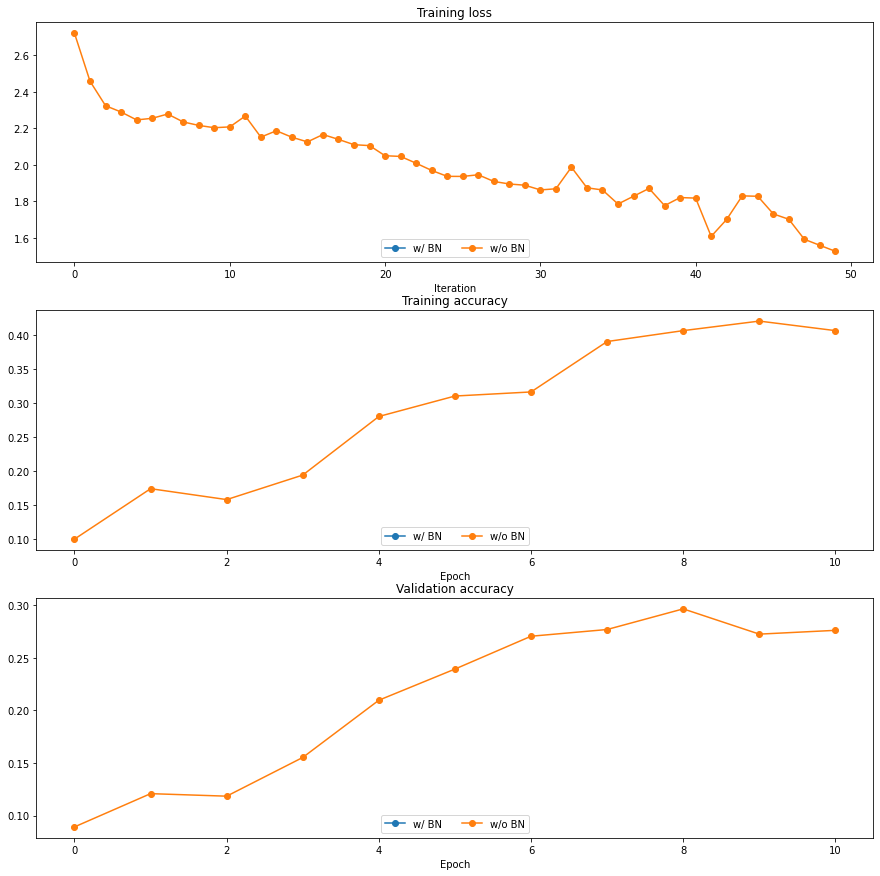

In [ ]:
plt.subplot(3, 1, 1)
plot_training_history_bn('Training loss','Iteration', [solver], [bn_solver], \
                      lambda x: x.loss_history, bl_marker='-o', bn_marker='-o')
plt.subplot(3, 1, 2)
plot_training_history_bn('Training accuracy','Epoch', [solver], [bn_solver], \
                      lambda x: x.train_acc_history, bl_marker='-o', bn_marker='-o')
plt.subplot(3, 1, 3)
plot_training_history_bn('Validation accuracy','Epoch', [solver], [bn_solver], \
                      lambda x: x.val_acc_history, bl_marker='-o', bn_marker='-o')

plt.gcf().set_size_inches(15, 15)
plt.show()

In [ ]:
fix_random_seed(0)

# Try training a very deep net with batchnorm
num_train = 10000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = data_dict['X_train'].shape[1:]
num_epochs = 5
lrs = [2e-1, 1e-1, 5e-2]
lrs = [5e-3, 1e-2, 2e-2]

solvers = []
for lr in lrs:
  print('No normalization: learning rate = ', lr)
  model = DeepConvNet(input_dims=input_dims, num_classes=10,
                      num_filters=[8, 8, 8],
                      max_pools=[0, 1, 2],
                      weight_scale='kaiming',
                      batchnorm=False,
                      reg=1e-5, **to_float_cuda)
  solver = Solver(model, small_data,
                  num_epochs=num_epochs, batch_size=100,
                  update_rule=sgd_momentum,
                  optim_config={
                    'learning_rate': lr,
                  },
                  verbose=False, device='cuda')
  solver.train()
  solvers.append(solver)

bn_solvers = []
for lr in lrs:
  print('Normalization: learning rate = ', lr)
  bn_model = DeepConvNet(input_dims=input_dims, num_classes=10,
                         num_filters=[8, 8, 16, 16, 32, 32],
                         max_pools=[1, 3, 5],
                         weight_scale='kaiming',
                         batchnorm=True,
                         reg=1e-5, **to_float_cuda)
  bn_solver = Solver(bn_model, small_data,
                     num_epochs=num_epochs, batch_size=128,
                     update_rule=sgd_momentum,
                     optim_config={
                       'learning_rate': lr,
                     },
                     verbose=False, device='cuda')
  bn_solver.train()
  bn_solvers.append(bn_solver)

No normalization: learning rate =  0.005
No normalization: learning rate =  0.01
No normalization: learning rate =  0.02
Normalization: learning rate =  0.005


RuntimeError: ignored

In [ ]:
plt.subplot(2, 1, 1)
plot_training_history_bn('Training accuracy (Batch Normalization)','Epoch', solvers, bn_solvers, \
                      lambda x: x.train_acc_history, bl_marker='-^', bn_marker='-o', labels=[' lr={:.0e}'.format(lr) for lr in lrs])
plt.subplot(2, 1, 2)
plot_training_history_bn('Validation accuracy (Batch Normalization)','Epoch', solvers, bn_solvers, \
                      lambda x: x.val_acc_history, bl_marker='-^', bn_marker='-o', labels=[' lr={:.0e}'.format(lr) for lr in lrs])

plt.gcf().set_size_inches(15, 10)
plt.show()